# 0. Import

In [1]:
import numpy as np

import torch
import torch.nn as nn

In [1]:
from paperswithtopic.config import load_config
from paperswithtopic.preprocess import Preprocess
from paperswithtopic.dataloader import get_dataloader
from paperswithtopic.model import BERTClassification
from paperswithtopic.run import run

C:\Users\pha\anaconda3\envs\xai501\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
cfg = load_config()
cfg.use_saved = True

In [3]:
run(cfg)

[load_data] 0.2 sec 
NUM TRAIN 3998 | NUM VALID 1000
TRAIN:: AUC 0.4934242787755647 | LOSS 83.18610382080078
VALID:: AUC 0.5060342159407225 | LOSS 39.217105865478516
TRAIN:: AUC 0.4971230366667291 | LOSS 39.784488677978516
VALID:: AUC 0.5055511992397261 | LOSS 39.053157806396484


AttributeError: 'EasyDict' object has no attribute 'patience'

In [13]:
model(paper)

tensor([[0.0618, 0.0610, 0.0602, 0.0636, 0.0618, 0.0647, 0.0567, 0.0646, 0.0588,
         0.0680, 0.0588, 0.0590, 0.0652, 0.0680, 0.0612, 0.0666],
        [0.0598, 0.0607, 0.0678, 0.0584, 0.0621, 0.0660, 0.0602, 0.0628, 0.0559,
         0.0638, 0.0675, 0.0607, 0.0686, 0.0612, 0.0625, 0.0619],
        [0.0560, 0.0664, 0.0555, 0.0689, 0.0610, 0.0630, 0.0614, 0.0670, 0.0613,
         0.0616, 0.0632, 0.0658, 0.0639, 0.0589, 0.0649, 0.0613],
        [0.0611, 0.0619, 0.0691, 0.0636, 0.0668, 0.0567, 0.0643, 0.0618, 0.0566,
         0.0591, 0.0626, 0.0646, 0.0621, 0.0639, 0.0599, 0.0658],
        [0.0608, 0.0618, 0.0604, 0.0639, 0.0633, 0.0680, 0.0562, 0.0602, 0.0645,
         0.0739, 0.0634, 0.0614, 0.0618, 0.0566, 0.0628, 0.0609],
        [0.0639, 0.0641, 0.0598, 0.0625, 0.0616, 0.0624, 0.0588, 0.0621, 0.0687,
         0.0635, 0.0648, 0.0629, 0.0607, 0.0610, 0.0605, 0.0628],
        [0.0661, 0.0620, 0.0636, 0.0613, 0.0597, 0.0665, 0.0672, 0.0628, 0.0624,
         0.0601, 0.0583, 0.0546, 0.06

## 0.1 Import

In [3]:
import yaml
import numpy as np
import pandas as pd
from tqdm import tqdm
from urllib import parse
from datetime import datetime
from typing import Dict, List, Optional
from collections import Counter
import seaborn as sns
sns.set_theme(context='notebook', palette='Reds_r')

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader

## 0.2 Load Data

In [4]:
paper_df = pd.read_csv('paperswithtopic.csv', index_col=0)
paper_df[paper_df >= 1] = 1
paper_df = paper_df.astype({c: 'int8' for c in paper_df.columns})

In [5]:
paper_df.shape

(49980, 16)

In [6]:
paper_df.head()

,adversarial,audio,computer-code,computer-vision,graphs,knowledge-base,medical,methodology,miscellaneous,music,natural-language-processing,playing-games,reasoning,robots,speech,time-series
Mockingbird: Defending Against Deep-Learning-Based Website Fingerprinting Attacks with Adversarial Traces,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Attacking Text Classifiers via Sentence Rewriting Sampler,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
"Best Practices for Noise-Based Augmentation to Improve the Performance of Emotion Recognition ""In the Wild""",1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
Fashion-Guided Adversarial Attack on Person Segmentation,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Adversarial Diffusion Attacks on Graph-based Traffic Prediction Models,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
paper2idx = {p: i for p, i in enumerate(paper_df.index)}
X_raw = list(map(str.lower, paper2idx.values()))

using `re` module to find which letters are unique

In [8]:
from itertools import chain
unique_letters = set(' '.join(chain(X_raw)))

In [9]:
len(unique_letters)

415

# 1. EDA

## 1.1 How Labels are distributed

In [21]:
num_areas = pd.Series(paper_df.sum(axis=1))

<AxesSubplot:title={'center':'Histogram of number of labels'}, xlabel='Number of Labels per paper', ylabel='Counts'>

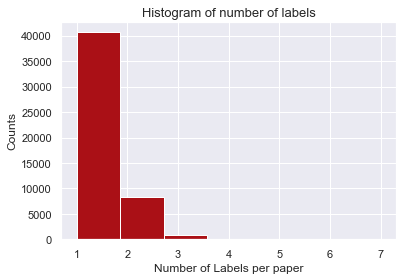

In [10]:
fig, ax = plt.subplots()
ax.set_title('Histogram of number of labels', fontdict={'size': 13})
ax.set_xlabel('Number of Labels per paper')
ax.set_ylabel('Counts')
num_areas.hist(ax=ax, bins=7)

<AxesSubplot:title={'center':'Number of papers per Area'}>

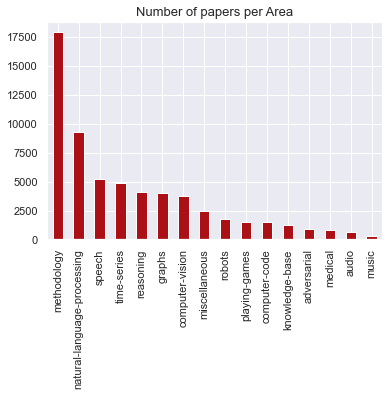

In [11]:
area_dist = paper_df.sum(axis=0)
fig, ax = plt.subplots()
ax.set_title('Number of papers per Area', fontsize=13)
area_dist.sort_values(ascending=False).plot(kind='bar', ax=ax)

## 1.2 Preprocessing

1. change `:` to ` :` with space in front.
2. change `-` to just space

In [10]:
X_raw

['mockingbird: defending against deep-learning-based website fingerprinting attacks with adversarial traces',
 'attacking text classifiers via sentence rewriting sampler',
 'best practices for noise-based augmentation to improve the performance of emotion recognition "in the wild"',
 'fashion-guided adversarial attack on person segmentation',
 'adversarial diffusion attacks on graph-based traffic prediction models',
 'mitigating adversarial attack for compute-in-memory accelerator utilizing on-chip finetune',
 'adversarial attack in the context of self-driving',
 'statistical inference for individual fairness',
 'adversarial attacks on camera-lidar models for 3d car detection',
 'anti-adversarially manipulated attributions for weakly and semi-supervised semantic segmentation',
 'towards robust speech-to-text adversarial attack',
 'generating unrestricted adversarial examples via three parameters',
 'internal wasserstein distance for adversarial attack and defense',
 'stochastic-hmds: a

In [11]:
for idx, paper in enumerate(X_raw):
    
    paper = paper.replace(':', ' :')
    paper = paper.replace('-', ' ')
    X_raw[idx] = paper

use ascii code only from 032 ~ 126

In [110]:
_pad = '<pad>'
_unk = '<unk>'

ascii_list = list(range(48, 58)) + list(range(65, 91)) + list(range(97, 123))
letter_mapper = {
    chr(_ascii): i+2 for i, _ascii in enumerate(ascii_list)
}
letter_mapper[_pad] = 0
letter_mapper[_unk] = 1

word_mapper = dict()

In [111]:
letter_mapper

{'0': 2,
 '1': 3,
 '2': 4,
 '3': 5,
 '4': 6,
 '5': 7,
 '6': 8,
 '7': 9,
 '8': 10,
 '9': 11,
 'A': 12,
 'B': 13,
 'C': 14,
 'D': 15,
 'E': 16,
 'F': 17,
 'G': 18,
 'H': 19,
 'I': 20,
 'J': 21,
 'K': 22,
 'L': 23,
 'M': 24,
 'N': 25,
 'O': 26,
 'P': 27,
 'Q': 28,
 'R': 29,
 'S': 30,
 'T': 31,
 'U': 32,
 'V': 33,
 'W': 34,
 'X': 35,
 'Y': 36,
 'Z': 37,
 'a': 38,
 'b': 39,
 'c': 40,
 'd': 41,
 'e': 42,
 'f': 43,
 'g': 44,
 'h': 45,
 'i': 46,
 'j': 47,
 'k': 48,
 'l': 49,
 'm': 50,
 'n': 51,
 'o': 52,
 'p': 53,
 'q': 54,
 'r': 55,
 's': 56,
 't': 57,
 'u': 58,
 'v': 59,
 'w': 60,
 'x': 61,
 'y': 62,
 'z': 63,
 '<pad>': 0,
 '<unk>': 1}

In [113]:
letter_counter = {k: 0 for k in letter_mapper.keys()}
unk_letterset = set()
for p in X_raw:
    
    for letter in p:
        
        try:
            if letter_counter.get(letter) >= 0:
                letter_counter[letter] += 1
            
        except:
            letter_counter[_unk] += 1
            unk_letterset.add(letter)

In [114]:
len(unk_letterset)

378

and use ♪ for unknown tokens

In [115]:
is_valid = lambda l: l in letter_mapper.keys()
def encode(paper, idx):

    for word in list(filter(lambda x: x, paper.split(' '))):
        
        if word in word_mapper.values():
            pass
        
        elif all(filter(is_valid, word)):
            word_mapper[idx] = word
            idx += 1
            
    return idx

In [116]:
idx = 2
word_mapper = {0: '<pad>', 1: '<unk>'}
for paper in X_raw:
    idx = encode(paper, idx)

In [117]:
def remove(sentence):
    
    for _unk in unk_letterset:
        sentence = sentence.replace(_unk, '')
    return sentence

In [118]:
X_filter = list(map(remove, X_raw))

## 1.3 Frequency of words

In [19]:
from collections import Counter
frequency = Counter(chain(*(map(lambda x: x.split(' '), X_raw))))
frequency_df = pd.Series(frequency)

<AxesSubplot:title={'center':'Word Frequency Histogram, more than 1,000'}, xlabel='# of words'>

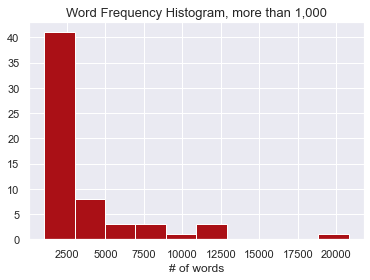

In [20]:
fig, ax = plt.subplots()
ax.set_title('Word Frequency Histogram, more than 1,000', fontsize=13)
ax.set_xlabel('# of words')
frequency_df[frequency_df > 1000].hist()

In [21]:
frequency_df[frequency_df > 1000].sort_values(ascending=False)

for               20794
:                 12765
learning          12035
and               11174
of                10183
a                  8686
with               7951
in                 7908
based              5223
to                 5052
the                5045
neural             4867
using              4755
deep               4740
networks           4114
on                 3901
detection          3260
data               3188
multi              3012
network            2847
graph              2824
model              2664
from               2529
models             2251
classification     2247
language           2201
via                2062
recognition        2057
time               2001
an                 1916
speech             1915
prediction         1658
machine            1646
adversarial        1570
estimation         1522
text               1509
reinforcement      1506
knowledge          1482
analysis           1452
by                 1438
                   1433
approach        

## 1.4 Length of Papers

In [23]:
len_frequency = list(map(
    lambda x: len(list(filter(lambda _: _, x.split(' ')))),
    X_raw
))
len_frequency = dict(sorted(Counter(len_frequency).items(), key=(lambda x: x[0])))

In [24]:
len_frequency = pd.Series(len_frequency)

<AxesSubplot:title={'center':'Paper length histogram'}, xlabel='Paper Length', ylabel='Counts'>

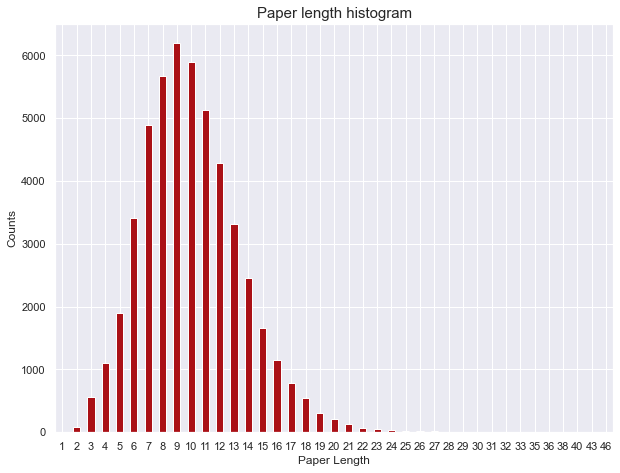

In [25]:
fig, ax = plt.subplots(figsize=(10, 7.51))
ax.set_title('Paper length histogram', fontsize=15)
ax.set_xlabel('Paper Length')
ax.set_ylabel('Counts')
len_frequency.plot(kind='bar', ax=ax, rot=0)

# 2. Pre-Embeddings

## 1. FastText

In [18]:
from gensim.models import FastText

In [81]:
X_filter_FT = list(map(str.split, X_filter))

In [94]:
model = FastText(sentences=X_filter_FT, window=50,vector_size=128)

In [95]:
model.wv.vectors.shape

(5447, 128)

In [103]:
model.wv.most_similar('neural network', topn=10)

[('networked', 0.9070553779602051),
 ('network', 0.9069962501525879),
 ('net', 0.8973541259765625),
 ('ney', 0.8950368165969849),
 ('networks,', 0.8825586438179016),
 ('networks?', 0.8813206553459167),
 ('architecture,', 0.8756234049797058),
 ('networks', 0.8662667870521545),
 ('architecture', 0.8642458319664001),
 ('networking', 0.8487641215324402)]

In [ ]:
model.wv.vectors

## 2. word2vec


## 3. Sentencepiece to break down

In [ ]:
import sentencepiece as spm

spm.SentencePieceTrainer.train(
    f"--input=X_tokenized.npy --model_prefix=paper --vocab_size={len(word_mapper) + 2}" +
    " --model_type=bpe " +
    " --max_sentence_length=50" + 
#     " --pad_id=0 --pad_piece=<pad>" +
#     " --unk_id=1 --unk_piece=<unk>" +
    " --hard_vocab_limit=false" +
    " --user_defined_symbols=<mask>"
)

# 2. Machine Learning - Naive Bayes

In [48]:
word2idx = {v: k for k, v in word_mapper.items()}

In [49]:
MAX_LEN = 45
def tokenize(paper):
    
    global MAX_LEN
    words = list(filter(lambda x: x, paper.split(' ')))
    tokens = [0 for _ in range(MAX_LEN)]
    for idx in range(min(len(words), MAX_LEN)):
        tokens[idx] = word2idx[words[idx]]
        
    return tokens

In [50]:
X_tokenized = [tokenize(paper) for paper in X_raw]

In [60]:
X_tokenized = np.array(X_tokenized)

In [61]:
X_tokenized

array([[   2,    3,    4, ...,    0,    0,    0],
       [  15,   16,   17, ...,    0,    0,    0],
       [  22,   23,   24, ...,    0,    0,    0],
       ...,
       [ 697,    6,    7, ...,    0,    0,    0],
       [ 218,  316,  848, ...,    0,    0,    0],
       [ 173, 7150, 4300, ...,    0,    0,    0]])

In [32]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

In [33]:
paper_df['adversarial'].values

array([1, 1, 1, ..., 0, 0, 0], dtype=int8)

In [34]:
nb_dict = dict()
for area in paper_df.columns:
    clf = GaussianNB()
    clf.fit(X_tokenized, paper_df[area].values)
    pred = clf.predict(X_tokenized)
    acc = accuracy_score(paper_df[area].values, pred)
    nb_dict[area] = acc * 100

NameError: name 'accuracy_score' is not defined

In [ ]:
nb_dict

In [ ]:
chance_lv_dict = (paper_df.sum(axis=0) / paper_df.shape[0]) * 100

In [ ]:
nb_compare = pd.DataFrame([nb_dict, chance_lv_dict],
             index=['Naive Bayes Accuracy', 'Chance Level']).T

In [ ]:
fig, ax = plt.subplots(figsize=(4.9, 6))
ax.set_title('Comparison between Chance level and Naive Bayes (%)', fontsize=13)
sns.heatmap(nb_compare, annot=True, fmt="f", linewidth=.5, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(1, 6))
sns.heatmap(pd.DataFrame(paper_df.sum(axis=0)), cbar=False, linewidth=.5,
            xticklabels=['# papers'],
            yticklabels=False, annot=True, fmt="d", ax=ax)

In [ ]:
_nb_dict = pd.DataFrame({k: [v, 'Naive Bayes'] for k, v in nb_dict.items()},
                       index=['Accuracy', 'kind']).T
_lv_dict = pd.DataFrame({k: [v, 'Chance Level'] for k, v in chance_lv_dict.items()},
                       index=['Accuracy', 'kind']).T

In [ ]:
_nb_compare = pd.concat([_nb_dict, _lv_dict])

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7.15))
ax.set_title('Comparison between Chance level and Naive Bayes (%)?')
ax.set_xticklabels(labels=_nb_compare.index, rotation=60)
sns.barplot(x=_nb_compare.index, y='Accuracy', hue='kind', data=_nb_compare, ax=ax)